Степанов Вячеслав Анатольевич

БСВ23-01

Практика №2 Массивы и векторные операции numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def my_beautiful_function(x):
    result = np.sin(x)
    return result;

In [3]:
def plotshow(number_of_points):
    x_min = -2
    x_max = 8

    x = np.linspace(x_min, x_max, number_of_points)
    y = np.empty(number_of_points)
    for i in range(number_of_points):
        y[i] = my_beautiful_function(x[i])

    fig, ax = plt.subplots(facecolor="white", figsize=(10,4))
    ax.scatter(x, y, s=20, color = 'red', label='points')
    ax.plot(x, y, lw=3, color = 'green', label='plot')
    ax.legend()
    plt.show()

## Генериация точек Х равномерно в заданном интервале, кол-во 10 шт.

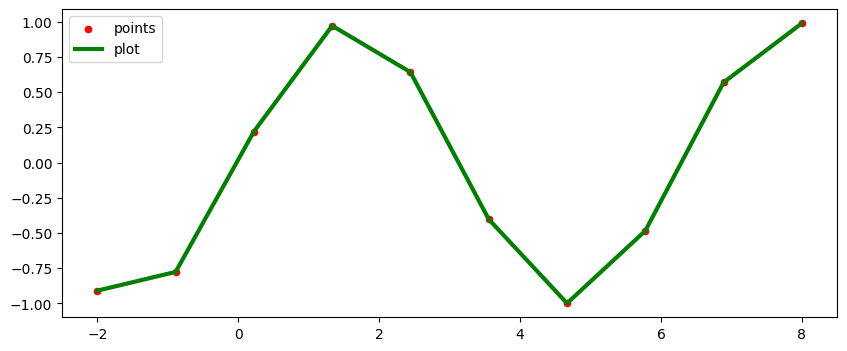

In [4]:
plotshow(10)

## Генериация точек Х равномерно в заданном интервале, кол-во 200 шт.

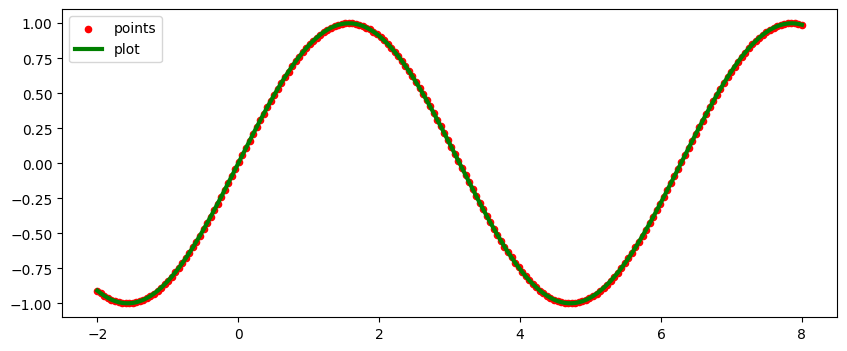

In [5]:
plotshow(200)

Вывод: График получился более плавный и по сравнению с графиком, в котором было 10 точек, в этом графике видны те "места", которые "оборвались" в первом графике. График стал более подробным и ясным для меня.

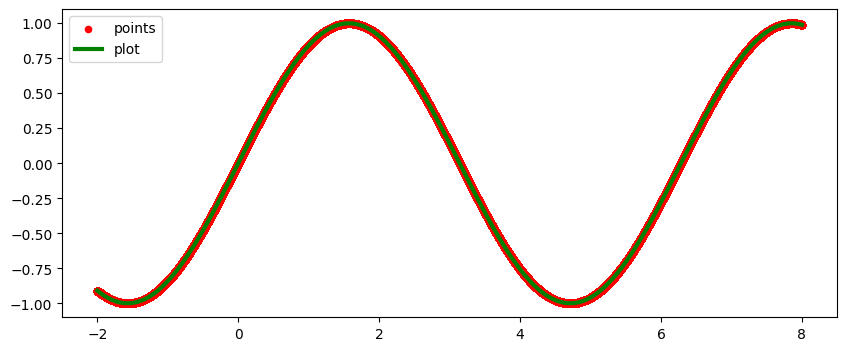

In [6]:
# долго, но более информативно, хотя ... Не необходимо
plotshow(1000000)

## Случайно равномерно в заданном интервале, кол-во 40 шт.

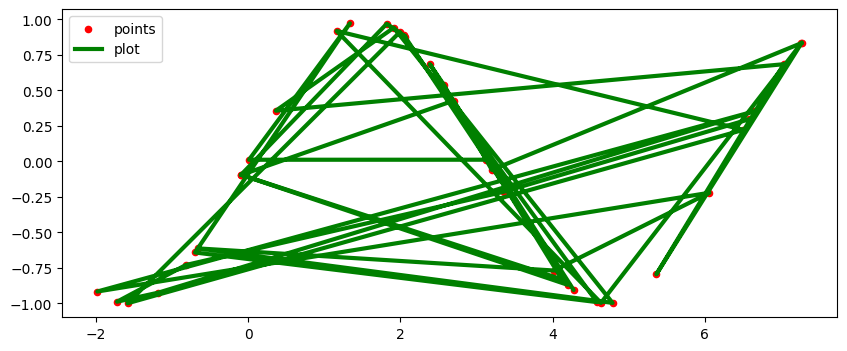

In [7]:
x_min = -2
x_max = 8
number_of_points = 40
x = np.random.uniform(x_min, x_max, number_of_points)
y = np.empty(number_of_points)
for i in range(number_of_points):
    y[i] = my_beautiful_function(x[i])
fig, ax = plt.subplots(facecolor="white", figsize=(10,4))
ax.scatter(x, y, s=20, color = 'red', label='points')
ax.plot(x, y, lw=3, color = 'green', label='plot')
ax.legend()
plt.show()

Вывод: График получился страшным и уродливым. Скорее всего это произошло из-за функции  np.random.uniform,  которая пусть и генерирует значения для Х, но генерирует она их случайно. Точки не предерживаются определенного порядка, как было в примерах выше и из-за этого получается данный кавардак.

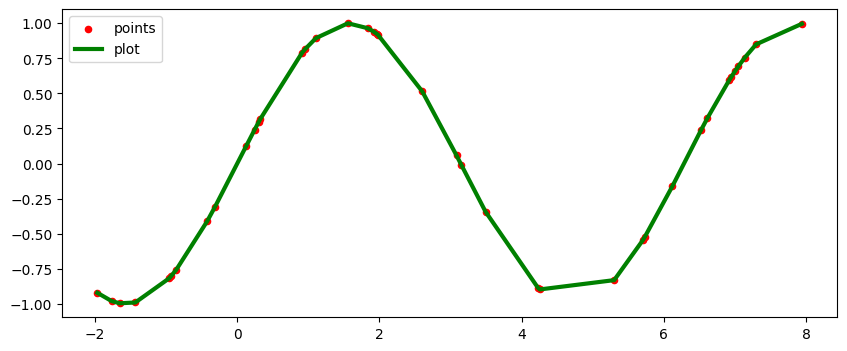

In [8]:
x_min = -2
x_max = 8
number_of_points = 40
x = np.random.uniform(x_min, x_max, number_of_points)
y = np.empty(number_of_points)
for i in range(number_of_points):
    y[i] = my_beautiful_function(x[i])
fig, ax = plt.subplots(facecolor="white", figsize=(10,4))
ax.scatter(x, y, s=20, color = 'red', label='points')
ax.plot(x[np.argsort(x)], y[np.argsort(x)], lw=3, color='green', label='plot')
ax.legend()
plt.show()

Вывод: график стал приятен глазу. Видно, что точки графика выбираются случайно ив какой-то стороне их больше, а в какой-то - меньше.

Благодаря функции np.argsort() Я смог отсортировать свой массив Х и У в порядке возростания

## Решение системы линейных уравнений

### Задача №3


$ A = 
\begin{bmatrix}
1 & 3 & 1 & 1 & 4\\
1 & 4 & 4 & 6 & 5\\
6 & 1 & 6 & 5 & 4\\
6 & 4 & 6 & 5 & 6\\
5 & 1 & 3 & 6 & 2
\end{bmatrix}, B = 
\begin{bmatrix}
34\\
70\\
66\\
82\\
50
\end{bmatrix}
$


Задать массивы numpy с матрицами A и В, вывести на экран.

In [9]:
A = np.array([[1, 3, 1, 1, 4],
                   [1, 4, 4, 6, 5],
                   [6, 1, 6, 5, 4],
                   [6, 4, 6, 5, 6],
                   [5, 1, 3, 6, 2]])
B = np.array([[34],[70],[66],[82],[50]])
print('Матрица А:', A)
print('Матрица В:', B)

Матрица А: [[1 3 1 1 4]
 [1 4 4 6 5]
 [6 1 6 5 4]
 [6 4 6 5 6]
 [5 1 3 6 2]]
Матрица В: [[34]
 [70]
 [66]
 [82]
 [50]]


Определить, имеет ли СЛАУ решение. Условие $\det(A) \neq 0$.

In [10]:
det = np.linalg.det(A)
if det == 0:
    print("СЛАУ необходимы до проверки")
else:
    print("СЛАУ имее решение")

СЛАУ имее решение


Решить СЛАУ стандартным солвером numpy: np.linalg.solve(A, B), показать вектор решений.

In [11]:
result = np.linalg.solve(A,B)
print("Вектор решенией:", result)

Вектор решенией: [[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


Решить СЛАУ алгебраически: $ \mathbf{x} = A^{-1} \mathbf{B} $.


In [12]:
result =  np.dot(np.linalg.inv(A), B)
print("Вектор решенией:", result)

Вектор решенией: [[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


### Вынес функции

In [13]:
def det(a):
    det = np.linalg.det(A)
    if det == 0:
        print("СЛАУ необходимы до проверки")
    else:
        print("СЛАУ имее решение")

In [14]:
def linalg_solve(A,B):
    result = np.linalg.solve(A,B)
    print("Вектор решенией:", result)

In [15]:
def linalg_inv(A,B):
    result =  np.dot(np.linalg.inv(A), B)
    print("Вектор решенией:", result)

### Задача №4


$ A = 
\begin{bmatrix}
1 & 2 & 3 & 5 & 5\\
2 & 4 & 6 & 2 & 4\\
4 & 3 & 4 & 4 & 3\\
1 & 3 & 4 & 3 & 6\\
4 & 3 & 2 & 6 & 2
\end{bmatrix}, B = 
\begin{bmatrix}
59\\
56\\
49\\
61\\
50
\end{bmatrix}
$


Задать массивы numpy с матрицами A и В, вывести на экран.

In [16]:
A = np.array([[1, 2, 3, 5, 5],
                   [2, 4, 6, 2, 4],
                   [4, 3, 4, 4, 3],
                   [1, 3, 4, 3, 6],
                   [4, 3, 2, 6, 2]])
B = np.array([[59],[56],[49],[61],[50]])
print('Матрица А:', A)
print('Матрица В:', B)

Матрица А: [[1 2 3 5 5]
 [2 4 6 2 4]
 [4 3 4 4 3]
 [1 3 4 3 6]
 [4 3 2 6 2]]
Матрица В: [[59]
 [56]
 [49]
 [61]
 [50]]


Определить, имеет ли СЛАУ решение. Условие $\det(A) \neq 0$.

In [17]:
det(A)

СЛАУ имее решение


Решить СЛАУ стандартным солвером numpy: np.linalg.solve(A, B), показать вектор решений.

In [18]:
linalg_solve(A,B)

Вектор решенией: [[-1.44444444]
 [ 5.11111111]
 [ 2.11111111]
 [ 4.66666667]
 [ 4.11111111]]


Решить СЛАУ алгебраически: $ \mathbf{x} = A^{-1} \mathbf{B} $.


In [19]:
linalg_inv(A,B)

Вектор решенией: [[-1.44444444]
 [ 5.11111111]
 [ 2.11111111]
 [ 4.66666667]
 [ 4.11111111]]


### Задача №5

$ A = 
\begin{bmatrix}
4 & 2 & 4 & 4 & 2\\
6 & 1 & 6 & 6 & 3\\
3 & 6 & 5 & 6 & 1\\
4 & 1 & 4 & 2 & 3\\
2 & 6 & 2 & 1 & 6
\end{bmatrix}, B = 
\begin{bmatrix}
46\\
65\\
59\\
41\\
54
\end{bmatrix}
$


Задать массивы numpy с матрицами A и В, вывести на экран.

In [20]:
A = np.array([[4, 2, 4, 4, 2],
                   [6, 1, 6, 6, 3],
                   [3, 6, 5, 6, 1],
                   [4, 1, 4, 2, 3],
                   [2, 6, 2, 1, 6]])
B = np.array([[46],[65],[59],[41],[54]])
print('Матрица А:', A)
print('Матрица В:', B)


Матрица А: [[4 2 4 4 2]
 [6 1 6 6 3]
 [3 6 5 6 1]
 [4 1 4 2 3]
 [2 6 2 1 6]]
Матрица В: [[46]
 [65]
 [59]
 [41]
 [54]]


Определить, имеет ли СЛАУ решение. Условие $\det(A) \neq 0$.

In [21]:
det(A)

СЛАУ имее решение


Решить СЛАУ стандартным солвером numpy: np.linalg.solve(A, B), показать вектор решений.

In [22]:
linalg_solve(A,B)

Вектор решенией: [[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


Решить СЛАУ алгебраически: $ \mathbf{x} = A^{-1} \mathbf{B} $.


In [23]:
linalg_inv(A,B)

Вектор решенией: [[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


### Задача №1

$ A = 
\begin{bmatrix}
2 & 6 & 6 & 4 & 3\\
2 & 2 & 5 & 1 & 2\\
1 & 6 & 1 & 3 & 1\\
5 & 1 & 1 & 6 & 6\\
2 & 1 & 5 & 5 & 1
\end{bmatrix}, B = 
\begin{bmatrix}
67\\
35\\
33\\
64\\
44
\end{bmatrix}
$


Задать массивы numpy с матрицами A и В, вывести на экран.

In [24]:
A = np.array([[2, 6, 6, 4, 3],
              [2, 2, 5, 1, 2],
              [1, 6, 1, 3, 1],
              [5, 1, 1, 6, 6],
              [2, 1, 5, 5, 1]])
B = np.array([[67],[35],[33],[64],[44]])
print('Матрица А:', A)
print('Матрица В:', B)


Матрица А: [[2 6 6 4 3]
 [2 2 5 1 2]
 [1 6 1 3 1]
 [5 1 1 6 6]
 [2 1 5 5 1]]
Матрица В: [[67]
 [35]
 [33]
 [64]
 [44]]


Определить, имеет ли СЛАУ решение. Условие $\det(A) \neq 0$.

In [25]:
det(A)

СЛАУ имее решение


Решить СЛАУ стандартным солвером numpy: np.linalg.solve(A, B), показать вектор решений.

In [26]:
linalg_solve(A,B)

Вектор решенией: [[-2.69060773]
 [ 1.84530387]
 [ 3.44198895]
 [ 4.57458564]
 [ 7.45303867]]


Решить СЛАУ алгебраически: $ \mathbf{x} = A^{-1} \mathbf{B} $.


In [27]:
linalg_inv(A,B)

Вектор решенией: [[-2.69060773]
 [ 1.84530387]
 [ 3.44198895]
 [ 4.57458564]
 [ 7.45303867]]


### Задача №2

$ A = 
\begin{bmatrix}
4 & 4 & 4 & 1 & 6\\
4 & 6 & 6 & 2 & 4\\
3 & 4 & 5 & 4 & 5\\
3 & 4 & 5 & 1 & 4\\
2 & 5 & 6 & 2 & 5
\end{bmatrix}, B = 
\begin{bmatrix}
58\\
62\\
67\\
50\\
63
\end{bmatrix}
$


Задать массивы numpy с матрицами A и В, вывести на экран.

In [28]:
A = np.array([[4, 4, 4, 1, 6],
              [4, 6, 6, 2, 4],
              [3, 4, 5, 4, 5],
              [3, 4, 5, 1, 4],
              [2, 5, 6, 2, 5]])
B = np.array([[58],[62],[67],[50],[63]])
print('Матрица А:', A)
print('Матрица В:', B)


Матрица А: [[4 4 4 1 6]
 [4 6 6 2 4]
 [3 4 5 4 5]
 [3 4 5 1 4]
 [2 5 6 2 5]]
Матрица В: [[58]
 [62]
 [67]
 [50]
 [63]]


Определить, имеет ли СЛАУ решение. Условие $\det(A) \neq 0$.

In [29]:
det(A)

СЛАУ имее решение


Решить СЛАУ стандартным солвером numpy: np.linalg.solve(A, B), показать вектор решений.

In [30]:
linalg_solve(A,B)

Вектор решенией: [[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


Решить СЛАУ алгебраически: $ \mathbf{x} = A^{-1} \mathbf{B} $.


In [31]:
linalg_inv(A,B)

Вектор решенией: [[1.]
 [2.]
 [3.]
 [4.]
 [5.]]
